In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score

# Evaluation of the best subset of data

In [6]:
df = pd.read_csv('data/df_best.csv', index_col=0)
X, y = df.iloc[:, :-1], df.iloc[:, -1] 
df.head()

,Var_02,Var_18,obs_count__0,Var_11,Var_19,Var_01,Var_17,Var_16,Var_21,Var_03,default
0,-0.724064,-0.724064,1,-0.553277,-0.553277,-0.613603,-0.601867,-0.613603,-0.526584,-0.222252,0
1,-0.707214,-0.707214,0,-0.551279,-0.551279,-0.611993,-0.588164,-0.611993,-0.526349,-0.222246,0
2,-0.712806,-0.712806,0,-0.551952,-0.551952,-0.614145,-0.590019,-0.614145,-0.526618,-0.222275,0
3,-0.694199,-0.694199,0,-0.549676,-0.549676,-0.612755,-0.574135,-0.612755,-0.526691,-0.222221,0
4,-0.714466,-0.714466,0,-0.552150,-0.552150,-0.613094,-0.593405,-0.613094,-0.526146,-0.222223,0


## PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(X)
X_pca = pca.transform(X)[:, :2]

First two principal components explain most of the variance in data, but looking at the scatter plot and the location of default observations it is not easy to separate data using this approach. 

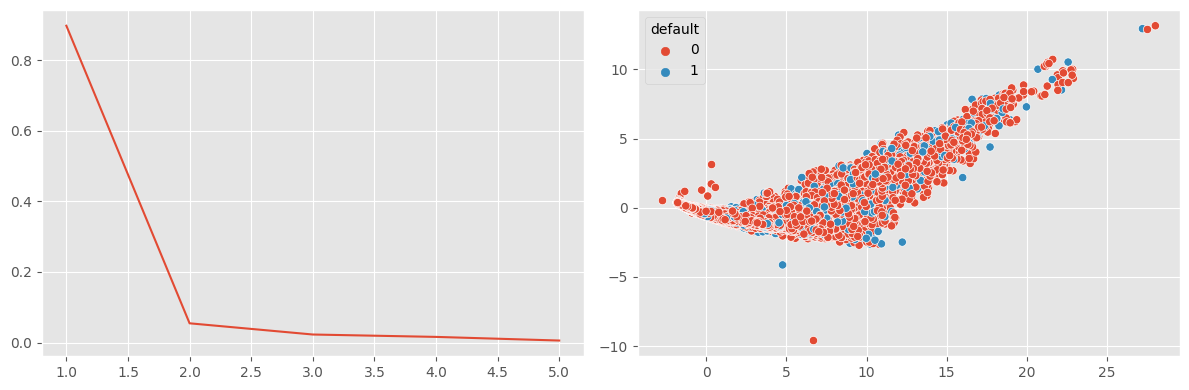

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.arange(1, 6), pca.explained_variance_ratio_)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, ax=ax[1])
fig.tight_layout()